<a href="https://colab.research.google.com/github/glomanu/football-home-adv/blob/main/New_Home_adv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imported the functions that might come of use throughout the investigation.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Importing the necessary data regarding the international games and storing them in a form of dataframes.

In [4]:
df1=pd.read_csv('results.csv') #remember to upload the file
df2=pd.read_csv('shootouts.csv') #remember to upload the file
df1, df2

(             date  home_team   away_team  home_score  away_score tournament  \
 0      1872-11-30   Scotland     England         0.0         0.0   Friendly   
 1      1873-03-08    England    Scotland         4.0         2.0   Friendly   
 2      1874-03-07   Scotland     England         2.0         1.0   Friendly   
 3      1875-03-06    England    Scotland         2.0         2.0   Friendly   
 4      1876-03-04   Scotland     England         3.0         0.0   Friendly   
 ...           ...        ...         ...         ...         ...        ...   
 28362  2005-12-14   Maldives       India         0.0         1.0   SAFF Cup   
 28363  2005-12-14     Mexico     Hungary         2.0         0.0   Friendly   
 28364  2005-12-14   Pakistan  Bangladesh         0.0         1.0   SAFF Cup   
 28365  2005-12-14     Zambia    DR Congo         4.0         1.0   Friendly   
 28366  2005-12-16  Mauritius       Réuni         NaN         NaN        NaN   
 
            city        country neutra

Checking the datatypes of the values stored in each column.

In [5]:
print(df1.dtypes)
print()
print(df2.dtypes)

date           object
home_team      object
away_team      object
home_score    float64
away_score    float64
tournament     object
city           object
country        object
neutral        object
dtype: object

date         object
home_team    object
away_team    object
winner       object
dtype: object


Some of the rows contain NaN values, so we delete them.

In [6]:
df1 = df1.dropna()
df2 = df2.dropna()

After dropping some of the rows, we reset the indeces for the sake of integrity and conveniece when using iloc or for loops.

In [7]:
df1.reset_index(drop=True, inplace=True)
df2.reset_index(drop=True, inplace=True)

In [8]:
df1

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...
28361,2005-12-12,Nepal,Bhutan,3.0,1.0,SAFF Cup,Karachi,Pakistan,True
28362,2005-12-14,Maldives,India,0.0,1.0,SAFF Cup,Karachi,Pakistan,True
28363,2005-12-14,Mexico,Hungary,2.0,0.0,Friendly,Phoenix,United States,True
28364,2005-12-14,Pakistan,Bangladesh,0.0,1.0,SAFF Cup,Karachi,Pakistan,False


We then create a new column called "outcome" which will take the value equal to 1 if the home team won, value of -1 if away team won, and 0 in case of a draw. The values of the outcome column are 0 at the beginning, and will be updated accordingly in the next step.

In [9]:
df1['outcome'] = 0
df1

<ipython-input-9-bb944af5a955>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['outcome'] = 0


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,outcome
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False,0
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False,0
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False,0
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False,0
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False,0
...,...,...,...,...,...,...,...,...,...,...
28361,2005-12-12,Nepal,Bhutan,3.0,1.0,SAFF Cup,Karachi,Pakistan,True,0
28362,2005-12-14,Maldives,India,0.0,1.0,SAFF Cup,Karachi,Pakistan,True,0
28363,2005-12-14,Mexico,Hungary,2.0,0.0,Friendly,Phoenix,United States,True,0
28364,2005-12-14,Pakistan,Bangladesh,0.0,1.0,SAFF Cup,Karachi,Pakistan,False,0


Updating the values in the outcome column.

In [10]:
for i in range(0, len(df1['date'])): #Gets the i element of the table
  if df1.iloc[i][3] > df1.iloc[i][4]: #Checks if the home goals are greater than that of the away goals
    df1['outcome'][i] = 1 #Sets outcome column equal to 1 if the home team won the match (has more goals than the away team)
  elif df1.iloc[i][3] == df1.iloc[i][4]: #Checks if the home goals are equal to that of the away goals
    df1['outcome'][i] = 0 #sets the outcome equal to 0 if the home and away teams tie
  else: #if home goals are not greater or equal to away goals...
    df1['outcome'][i] = -1 #Sets outcome column equal to -1 if the away team won the match (has more goals than the home team)

<ipython-input-10-101d8958b417>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['outcome'][i] = 0 #sets the outcome equal to 0 if the home and away teams tie
<ipython-input-10-101d8958b417>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['outcome'][i] = 1 #Sets outcome column equal to 1 if the home team won the match (has more goals than the away team)
<ipython-input-10-101d8958b417>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-

In [11]:
df1

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,outcome
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False,0
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False,1
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False,1
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False,0
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False,1
...,...,...,...,...,...,...,...,...,...,...
28361,2005-12-12,Nepal,Bhutan,3.0,1.0,SAFF Cup,Karachi,Pakistan,True,1
28362,2005-12-14,Maldives,India,0.0,1.0,SAFF Cup,Karachi,Pakistan,True,-1
28363,2005-12-14,Mexico,Hungary,2.0,0.0,Friendly,Phoenix,United States,True,1
28364,2005-12-14,Pakistan,Bangladesh,0.0,1.0,SAFF Cup,Karachi,Pakistan,False,-1


So far, in case the game ended in a draw in the regular time (90 minutes), the outcome value is equal to 0, regardless if the result changed in extra time/penalties. We use 'shootouts' database to consider that and update the 'outcome' column.

In [12]:
for i in range(0, len(df1['date'])): #Gets each i element in the first database(results)
  rowi = df1.iloc[i] #stores all the values of row i in a variable
  if rowi[9]!=0: #If the outcome is not 0(is not a tie) it is ignored
    continue
  for j in range(0, len(df2['date'])): #Gets each j element from the second database (shootouts)
    rowj = df2.iloc[j] #stores all the values of row j in a variable
    if rowi[0]==rowj[0] and rowi[1]==rowj[1]: #if the date of row i and row j match, and the name of the home team is the same...
      if rowj[1] == rowj[3]: #if the name of the home team in shootouts is the same as the name of the winning team in shootouts...
        df1['outcome'][i] = 1 #The outcome of the match is changed from 0 (tie in the outcome colume of results), to a 1 (home win in the outcome column of results)
      else: #if the name of the home team in shootouts is not the same as the name of the winning team in shootouts...
        df1['outcome'][i] = -1 #The outcome of the match is changed from 0 (tie in the outcome colume of results), to a -1 (away win in the outcome column of results)

<ipython-input-12-3e5736767f62>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['outcome'][i] = -1 #The outcome of the match is changed from 0 (tie in the outcome colume of results), to a -1 (away win in the outcome column of results)
<ipython-input-12-3e5736767f62>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['outcome'][i] = 1 #The outcome of the match is changed from 0 (tie in the outcome colume of results), to a 1 (home win in the outcome column of results)


In [13]:
df1.to_csv('modified_data.csv')

In [14]:
#fucks eveyrthing up if u run it for some reason
#df1 = pd.read_csv('modified_data.csv')

Too prove that the code works - let's check if there is a game which resulted in a draw in a regular time but has an outcome value different than 0.

In [15]:
df1

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,outcome
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False,0
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False,1
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False,1
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False,0
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False,1
...,...,...,...,...,...,...,...,...,...,...
28361,2005-12-12,Nepal,Bhutan,3.0,1.0,SAFF Cup,Karachi,Pakistan,True,1
28362,2005-12-14,Maldives,India,0.0,1.0,SAFF Cup,Karachi,Pakistan,True,-1
28363,2005-12-14,Mexico,Hungary,2.0,0.0,Friendly,Phoenix,United States,True,1
28364,2005-12-14,Pakistan,Bangladesh,0.0,1.0,SAFF Cup,Karachi,Pakistan,False,-1


Now, let's create piecharts to visualize the proportions of home wins, away wins, and ties.

But wait, we should also consider the 'neutrality' of the game.

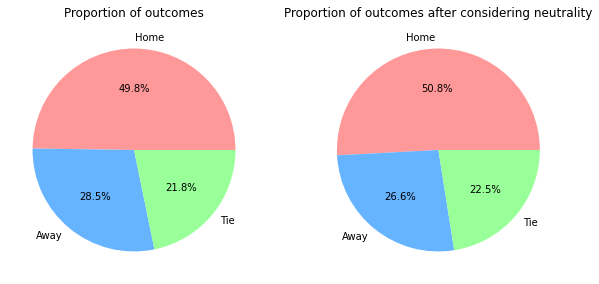

,date,home_team,away_team,home_score,away_score,tournament,city,country,outcome
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,0
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,1
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,1
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,0
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,1
...,...,...,...,...,...,...,...,...,...
21941,2005-12-10,Rwanda,Ethiopia,0.0,1.0,CECAFA Cup,Kigali,Rwanda,-1
21942,2005-12-11,DR Congo,Zambia,1.0,1.0,Friendly,Lubumbashi,DR Congo,0
21943,2005-12-11,Pakistan,Maldives,0.0,0.0,SAFF Cup,Karachi,Pakistan,0
21944,2005-12-14,Pakistan,Bangladesh,0.0,1.0,SAFF Cup,Karachi,Pakistan,-1


In [16]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,10))
colors_set = ['#ff9999','#66b3ff','#99ff99']

wins1=df1['outcome'].value_counts() #Counts the amount of each outcome that occured
wins1.index=['Home','Away','Tie'] #Changes the lable to Home Away or Tie to show who won the match
ax1.pie(wins1,labels=wins1.index,autopct='%.1f%%',colors=colors_set) #construct the pie chart
ax1.title.set_text('Proportion of outcomes') #setting a title of the plot

list_values = [] #creating an empty list
for i in range(0, len(df1['date'])): #iterating over all the rows
  rowi = df1.iloc[i] #storing an i-th row as rowi 
  if rowi[8]: #neutrality as a condition
    list_values.append(i) #if neutral=true then we add the index to the list
df1 = df1.drop(list_values) #getting rid of all the rows that correspond to the i-th indeces
df1.reset_index(drop=True, inplace=True) #resetting the indeces after dropping many rows
df1 = df1.drop('neutral', axis=1) #dropping the netutral column as it's useless now

wins2=df1['outcome'].value_counts() #Counts the amount of each outcome that occured
wins2.index=['Home','Away','Tie'] #Changes the lable to Home Away or Tie to show who won the match
ax2.pie(wins2,labels=wins2.index,autopct='%.1f%%',colors=colors_set, textprops={'color':"black"}) #construct the pie chart
ax2.title.set_text('Proportion of outcomes after considering neutrality') #setting a title of the plot

plt.show()
df1

Let's create three new columns which will be later used to show how cummulative number of wins, loses and draws changes over time.

In [17]:
df1['cumul_home_w']=0
df1['cumul_away_w']=0
df1['cumul_ties']=0
df1

,date,home_team,away_team,home_score,away_score,tournament,city,country,outcome,cumul_home_w,cumul_away_w,cumul_ties
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,0,0,0,0
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,1,0,0,0
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,1,0,0,0
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,0,0,0,0
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
21941,2005-12-10,Rwanda,Ethiopia,0.0,1.0,CECAFA Cup,Kigali,Rwanda,-1,0,0,0
21942,2005-12-11,DR Congo,Zambia,1.0,1.0,Friendly,Lubumbashi,DR Congo,0,0,0,0
21943,2005-12-11,Pakistan,Maldives,0.0,0.0,SAFF Cup,Karachi,Pakistan,0,0,0,0
21944,2005-12-14,Pakistan,Bangladesh,0.0,1.0,SAFF Cup,Karachi,Pakistan,-1,0,0,0


In [18]:
df1['cumul_ties'][0]=1
df1

<ipython-input-18-40327648695f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['cumul_ties'][0]=1


,date,home_team,away_team,home_score,away_score,tournament,city,country,outcome,cumul_home_w,cumul_away_w,cumul_ties
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,0,0,0,1
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,1,0,0,0
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,1,0,0,0
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,0,0,0,0
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
21941,2005-12-10,Rwanda,Ethiopia,0.0,1.0,CECAFA Cup,Kigali,Rwanda,-1,0,0,0
21942,2005-12-11,DR Congo,Zambia,1.0,1.0,Friendly,Lubumbashi,DR Congo,0,0,0,0
21943,2005-12-11,Pakistan,Maldives,0.0,0.0,SAFF Cup,Karachi,Pakistan,0,0,0,0
21944,2005-12-14,Pakistan,Bangladesh,0.0,1.0,SAFF Cup,Karachi,Pakistan,-1,0,0,0


Updating the values in the "cummulative" columns.

In [19]:
for i in range(1, len(df1['date'])): #iterating over all the rows
  rowi = df1.iloc[i] #storing an i-th row as rowi 
  if rowi[8]==1:
    df1['cumul_home_w'][i]=df1['cumul_home_w'][i-1]+1
    df1['cumul_away_w'][i]=df1['cumul_away_w'][i-1]
    df1['cumul_ties'][i]=df1['cumul_ties'][i-1]
  elif rowi[8]==-1:
    df1['cumul_home_w'][i]=df1['cumul_home_w'][i-1]
    df1['cumul_away_w'][i]=df1['cumul_away_w'][i-1]+1
    df1['cumul_ties'][i]=df1['cumul_ties'][i-1]
  else:
    df1['cumul_home_w'][i]=df1['cumul_home_w'][i-1]
    df1['cumul_away_w'][i]=df1['cumul_away_w'][i-1]
    df1['cumul_ties'][i]=df1['cumul_ties'][i-1]+1
df1

<ipython-input-19-f344b4b459bc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['cumul_home_w'][i]=df1['cumul_home_w'][i-1]+1
<ipython-input-19-f344b4b459bc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['cumul_away_w'][i]=df1['cumul_away_w'][i-1]
<ipython-input-19-f344b4b459bc>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['cumul_ties'][i]=df1['cumul_ties'][i-1]
<ipython-input-19-f344b4b459bc>:12: SettingWithCopyWar

,date,home_team,away_team,home_score,away_score,tournament,city,country,outcome,cumul_home_w,cumul_away_w,cumul_ties
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,0,0,0,1
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,1,1,0,1
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,1,2,0,1
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,0,2,0,2
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,1,3,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
21941,2005-12-10,Rwanda,Ethiopia,0.0,1.0,CECAFA Cup,Kigali,Rwanda,-1,11157,5847,4938
21942,2005-12-11,DR Congo,Zambia,1.0,1.0,Friendly,Lubumbashi,DR Congo,0,11157,5847,4939
21943,2005-12-11,Pakistan,Maldives,0.0,0.0,SAFF Cup,Karachi,Pakistan,0,11157,5847,4940
21944,2005-12-14,Pakistan,Bangladesh,0.0,1.0,SAFF Cup,Karachi,Pakistan,-1,11157,5848,4940


Plotting the result:

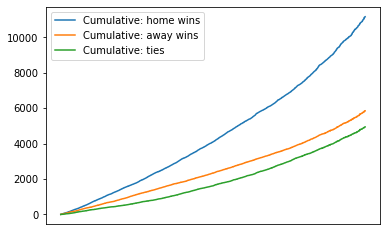

In [20]:
plt.plot(df1['date'], df1['cumul_home_w'], label = "Cumulative: home wins")
plt.plot(df1['date'], df1['cumul_away_w'], label = "Cumulative: away wins")
plt.plot(df1['date'], df1['cumul_ties'], label = "Cumulative: ties")
plt.legend()
plt.xticks([], "")
plt.show()

In [21]:
list_values = [] #creating an empty list
for i in range(0, len(df1['date'])): #iterating over all the rows
  rowi = df1.iloc[i] #storing an i-th row as rowi 
  if rowi[8]==0: #check for ties
    list_values.append(i) #if there is tie then we add the index to the list
df1 = df1.drop(list_values) #getting rid of all the rows that correspond to the i-th indeces
len(df1['date'])
df1.reset_index(drop=True, inplace=True)

In [22]:
df1

,date,home_team,away_team,home_score,away_score,tournament,city,country,outcome,cumul_home_w,cumul_away_w,cumul_ties
0,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,1,1,0,1
1,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,1,2,0,1
2,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,1,3,0,2
3,1876-03-25,Scotland,Wales,4.0,0.0,Friendly,Glasgow,Scotland,1,4,0,2
4,1877-03-03,England,Scotland,1.0,3.0,Friendly,London,England,-1,4,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
17001,2005-12-08,Rwanda,Uganda,1.0,0.0,CECAFA Cup,Kigali,Rwanda,1,11156,5846,4938
17002,2005-12-09,Pakistan,Afghanistan,1.0,0.0,SAFF Cup,Karachi,Pakistan,1,11157,5846,4938
17003,2005-12-10,Rwanda,Ethiopia,0.0,1.0,CECAFA Cup,Kigali,Rwanda,-1,11157,5847,4938
17004,2005-12-14,Pakistan,Bangladesh,0.0,1.0,SAFF Cup,Karachi,Pakistan,-1,11157,5848,4940


In [23]:
print('home team wins:', wins2[0],'','away team wins:',wins2[1]) #show number of wins and nuber of ties

home team wins: 11158  away team wins: 5848


In [24]:
n, p = wins2[0]+wins2[1], 0.5 #set the number of trials(observations) as the sum of the home and away wins since ties are disregarder for the sign test. 

In [25]:
import scipy.stats #install package used to execute the binomial distribution and normal distribution
import math

Now that we know the number of positive differences and negative differences, we know also the number of times the home and away teams have won. With this data we can perform a sign test to determine if the home advantage is statistically significant.

Normal distribution approximation as the n*p and n*(1-p) are both greater than 10.

In [26]:
mean=n/2 #calculate mean if we assume normal distribution
sd=math.sqrt(n)/2 #calculate tandard deviation if we assume normal distribution
cdf_value=scipy.stats.norm(loc=mean,scale=sd).cdf(wins2[0]) #calculates the total probability of number of home wins being less than or equal to the wins we have in the sample.
prob=1-cdf_value #calculates the total probability of number of home wins being greater than or equal to the wins we have in the sample(16871).
prob

0.0

In [27]:
r_values = list(range(n + 1)) #create a list of the number of trials
dist = [scipy.stats.binom.pmf(r, n, p) for r in r_values ] #perform the binomial distribution for the 
sum = 0
print(wins2[0])
for i in range(wins2[0], n+1):
  sum = sum + dist[i]
print('%.10f' % sum)

/usr/local/lib/python3.8/dist-packages/scipy/stats/_discrete_distns.py:67: RuntimeWarning: divide by zero encountered in _binom_pdf
  return _boost._binom_pdf(x, n, p)


11158
0.0000000000


Since we have established that the home advantage is statistically significant, we decided to show it graphically. A normal distribution is plotted with the goals of the home and away teams.
Since the home advantage is greater, the mean of the home team goals should be greater than that of the away team.

In [28]:
df1["away_score"].max()==df1['home_score'].max() #check if the max score is the same for both teams.

False

In [29]:
print(df1["away_score"].max(),'', df1['home_score'].max())

15.0  31.0


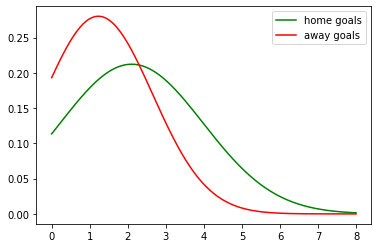

Average amount of home goals: 2.103
Average amount of away goals: 1.228


In [30]:
m_h=df1['home_score'].mean()
sd_h=df1['home_score'].std()

m_a=df1['away_score'].mean()
sd_a=df1['away_score'].std()


x=np.linspace(df1['home_score'].min(),8,1000)
y_h=scipy.stats.norm.pdf(x,m_h,sd_h)
y_a=scipy.stats.norm.pdf(x,m_a,sd_a)

plt.plot(x,y_h,label='home goals',color='g')
plt.plot(x,y_a,label='away goals',color='r')
plt.legend()
plt.show()

print('Average amount of home goals:','%.3f' % m_h)
print('Average amount of away goals:','%.3f' % m_a)

T-test do double check the calculations
T test is done with the assumption that the two groups are related. This is because a team can be away and can be home in different occasions. Teams also have different qualities.
Same team, but put into a different group can have an effect.

In [32]:
values = scipy.stats.ttest_rel(y_h,y_a)
print("p-value:", '%.6f' % values[1])

p-value: 0.000055
